How many dimensions does plot_decision_regions function works for? 

What is the maximum accuracy you can achieve with the least amount of features? 

How does the depth of the tree affect accuracy? In practice there is a depth of 3-4 that is optimal for most datasets. This allows the model to run enough functions to make accurate predictions without overfitting. If you go further than 5 levels you risk overfitting, and if there are not enough levels you risk miscategorizing data.

In [3]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')   

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv("MedTrial.csv")
df


,Age,Sex,BP,Cholesterol,Na_to_K,Med
0,23,F,HIGH,HIGH,25.355,Yipic
1,47,M,LOW,HIGH,13.093,Comodify
2,47,M,LOW,HIGH,10.114,Comodify
3,28,F,NORMAL,HIGH,7.798,Xlenify
4,61,F,LOW,HIGH,18.043,Yipic
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,Comodify
196,16,M,LOW,HIGH,12.006,Comodify
197,52,M,NORMAL,HIGH,9.894,Xlenify
198,23,M,NORMAL,NORMAL,14.020,Xlenify


In [6]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['Sex'] = labelencoder.fit_transform(df['Sex']) #changing sex from M & F to 0 & 1
df['BP'] = labelencoder.fit_transform(df['BP']) #chganing BP from HIGH, NORMAL, LOW to 0, 1, 2
df['Cholesterol'] = labelencoder.fit_transform(df['Cholesterol']) #changing Cholesterol from HIGH, NORMAL to 0, 1
df['Med'] = labelencoder.fit_transform(df['Med']) #changing Med from string name to 0, 1, 2, 3, 4

print(df['Med'].unique())

df

[4 2 3 0 1]


,Age,Sex,BP,Cholesterol,Na_to_K,Med
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [7]:
# extract the age and the sex 
X = df.iloc[:, [2, 4]].values #extracting the age and sex (highest corr in the matrix x)
y = df.iloc[:, 5] #extracting the target column

print(X)
print(y)

[[ 0.    25.355]
 [ 1.    13.093]
 [ 1.    10.114]
 [ 2.     7.798]
 [ 1.    18.043]
 [ 2.     8.607]
 [ 2.    16.275]
 [ 1.    11.037]
 [ 2.    15.171]
 [ 1.    19.368]
 [ 1.    11.767]
 [ 0.    19.199]
 [ 1.    15.376]
 [ 1.    20.942]
 [ 2.    12.703]
 [ 0.    15.516]
 [ 1.    11.455]
 [ 0.    13.972]
 [ 1.     7.298]
 [ 0.    25.974]
 [ 1.    19.128]
 [ 2.    25.917]
 [ 1.    30.568]
 [ 1.    15.036]
 [ 1.    33.486]
 [ 0.    18.809]
 [ 0.    30.366]
 [ 2.     9.381]
 [ 1.    22.697]
 [ 1.    17.951]
 [ 2.     8.75 ]
 [ 0.     9.567]
 [ 1.    11.014]
 [ 0.    31.876]
 [ 2.    14.133]
 [ 2.     7.285]
 [ 0.     9.445]
 [ 1.    13.938]
 [ 2.     9.709]
 [ 2.     9.084]
 [ 2.    19.221]
 [ 0.    14.239]
 [ 2.    15.79 ]
 [ 2.    12.26 ]
 [ 2.    12.295]
 [ 2.     8.107]
 [ 0.    13.091]
 [ 1.    10.291]
 [ 2.    31.686]
 [ 1.    19.796]
 [ 0.    19.416]
 [ 2.    10.898]
 [ 1.    27.183]
 [ 0.    18.457]
 [ 0.    10.189]
 [ 1.    14.16 ]
 [ 0.    11.34 ]
 [ 0.    27.826]
 [ 2.    10.09

In [8]:
#70% training and 30% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [9]:
print('Labels count in y:', np.bincount(y)) #counting the number of instances of each class in the dataset
print('Labels count in y_train:', np.bincount(y_train)) #counting the number of instances of each class in the training dataset
print('Labels count in y_test:', np.bincount(y_test)) #counting the number of instances of each class in the test

Labels count in y: [23 16 16 54 91]
Labels count in y_train: [16 11 11 38 64]
Labels count in y_test: [ 7  5  5 16 27]


In [10]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=5, 
                                    random_state=1)

C:\Users\benda\AppData\Local\Temp\ipykernel_1720\1735577829.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\benda\AppData\Local\Temp\ipykernel_1720\1735577829.py:38: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


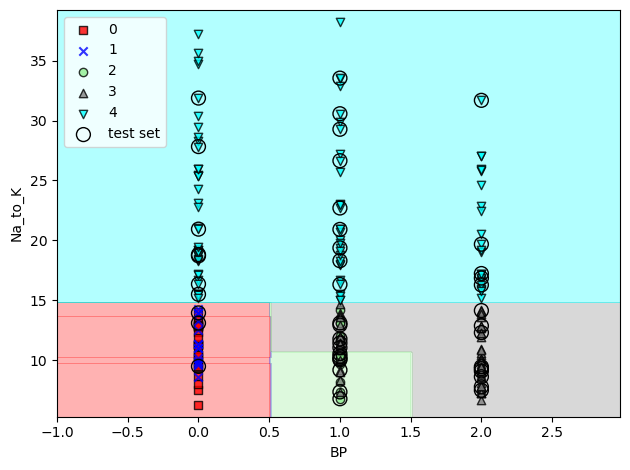

In [11]:
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('BP')
plt.ylabel('Na_to_K')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names= pd.unique(df['Med']),
                           feature_names=['BP', 
                                          'Na_to_K'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

TypeError: can only concatenate str (not "numpy.int32") to str

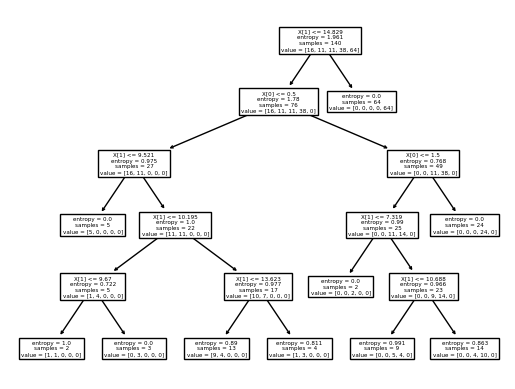

In [13]:
from sklearn import tree

tree.plot_tree(tree_model)
plt.show()

In [14]:
from sklearn import metrics 
y_pred = tree_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8833333333333333


C:\Users\benda\AppData\Local\Temp\ipykernel_1720\1735577829.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\benda\AppData\Local\Temp\ipykernel_1720\1735577829.py:38: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


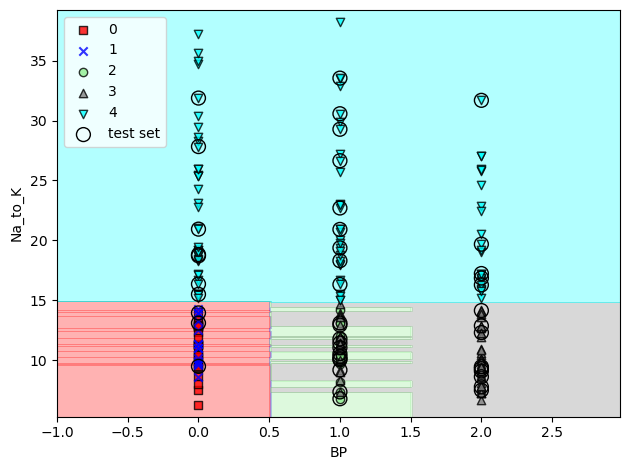

|--- feature_1 <= 14.829
|   |--- feature_1 <= 11.301
|   |   |--- feature_1 <= 9.710
|   |   |   |--- feature_0 <= 0.500
|   |   |   |   |--- feature_1 <= 9.521
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_1 >  9.521
|   |   |   |   |   |--- feature_1 <= 9.615
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_1 >  9.615
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_0 >  0.500
|   |   |   |   |--- feature_1 <= 8.260
|   |   |   |   |   |--- feature_1 <= 7.998
|   |   |   |   |   |   |--- feature_0 <= 1.500
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |--- feature_0 >  1.500
|   |   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |--- feature_1 >  7.998
|   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- feature_1 >  8.260
|   |   |   |   |   |--- class: 3.0
|   |   |--- feature_1 >  9.710
|   |   |   |--- feature_1 <= 11.132
|   |   |   |   |--- feature_0 <= 1.500
|   |   |   |   |   |

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('BP')
plt.ylabel('Na_to_K')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_22.png', dpi=300)
plt.show()

from sklearn.tree import export_text

print(export_text(forest.estimators_[0], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[1], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[2], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[3], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[4], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[5], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[6], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[7], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[8], 
                  spacing=3, decimals=3))

print(export_text(forest.estimators_[9], 
                  spacing=3, decimals=3))

In [16]:
y_pred = forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print (y_pred)
print (y_test)

0.9166666666666666
[1 4 4 4 3 4 2 4 3 3 0 4 4 0 4 4 4 4 3 4 3 3 0 4 0 1 4 4 4 3 4 4 3 1 3 3 0
 4 3 4 2 4 3 4 4 3 0 0 4 3 0 4 4 3 3 3 3 3 0 4]
85     1
165    4
172    4
6      4
159    3
93     4
2      2
183    4
129    3
1      2
64     1
173    4
168    4
118    0
62     4
107    4
12     4
190    4
106    3
180    4
51     3
102    2
137    0
175    4
142    1
151    1
185    4
40     4
42     4
103    3
20     4
143    4
58     3
54     1
16     3
199    3
101    0
164    4
152    3
49     4
158    2
91     4
197    3
23     4
13     4
195    2
76     0
100    0
50     4
67     3
191    0
121    4
157    4
3      3
43     3
181    3
27     3
105    3
187    0
74     4
Name: Med, dtype: int32


How many dimensions does plot_decision_regions function works for? It only works for 2 dimensions. If you want to add more dimensions you will need a 3d, 4d or more plot. 

What is the maximum accuracy you can achieve with the least amount of features? 0.88 is the maximum accuracy you can achieve with 2 features.

How does the depth of the tree affect accuracy? In practice there is a depth of 3-4 that is optimal for most datasets. This allows the model to run enough functions to make accurate predictions without overfitting. If you go further than 5 levels you risk overfitting, and if there are not enough levels you risk miscategorizing data.